In [1]:
import numpy as np
from Network import Network

Network trained with mse Cost Function. Layers: 
[Initial_Hidden Layer with 3 tanhyp Comprising Neurons. 
Neuron Weights Array: 
 [[-0.27439518  0.65162256]
 [ 0.16145557 -1.39261009]
 [ 0.10797637 -0.93554607]] 
 Next Layer in the NN is 3 Neurons Deep
 Hidden Layer with 3 sigmoid Comprising Neurons. 
Neuron Weights Array: 
 [[-0.42635133 -1.16808055 -0.3298415 ]
 [-1.19307166  0.56164906 -0.51468593]
 [-0.00438911 -0.98247962 -0.53035341]] 
 Next Layer in the NN is 1 Neurons Deep
 Output Layer with 1 sigmoid Comprising Neurons. 
Neuron Weights Array: 
 [[ 0.22520731  0.59732683 -0.26648908]]]
Epoch # 100
Epoch # 200
0.073309711253629
0.04190683017816883
0.12841434745211266
0.024191752169360245
0.019922091128869817
0.019862606075120626
0.017579740832871515
0.018249435975143075
0.013734072294120596
0.01447082808834244
0.017474209661915156
0.1455408754375935
0.014039183944822339
0.016339383947267277
0.14283917876812774
0.01618338341161596
0.015572150735291642
0.01598529514910418
0.015299

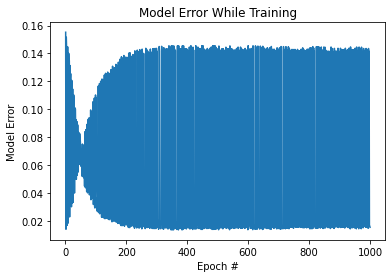

In [71]:
#testing the forward propagation of a network which solves the Binary And problem

# setting up test/train data arrays #CLEAN UP AND CHECK FOR ACCURACY
X_train = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y_train = np.array([[0], [1], [1], [0]])
Y_train_2 = np.array([[0], [0], [0], [1]])
X_test = np.array([[0, 0], [0, 0], [0, 1], [0, 1], [1, 0], [1, 0], [1,1], [1, 0], [1, 1]])
Y_test = np.array([[0], [0], [1], [1], [1],[1], [0], [1], [0]])
Y_test_2 = np.array([[0], [0], [0], [1], [1], [1], [0],[1]])

# creating model object
model = Network('mse', X_train, Y_train_2, X_train, Y_train_2, x_features=2,epoch_num=250, batch_size=4,
                layer_num=3, layer_depths=[3,3,1], learn_rate=0.3)

# adding hidden layers
model.add_Layer('tanhyp', 'initial_hidden')

model.add_Layer('sigmoid', 'hidden')

# adding output layer
model.add_Layer('sigmoid', 'output')

# printing the model
print(model)

# training model
model.train()

# plotting model error while training
model.plot_train_error()

print('Optimized Model: ')
print(model)

# testing model
model.test_regression()

In [72]:
model.predict(np.array([[1,1]]))

[[0.24737296]]
